In [68]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(1234)

# Generate an ensemble of drunken sailors in 2D

In [53]:
n_walks = 100000
n_steps = 1000

dirs = rng.choice([0, 1, 2, 3], size=(n_walks, n_steps))

In [54]:
dx = np.zeros((n_walks, n_steps), dtype=int)
dy = np.zeros((n_walks, n_steps), dtype=int)

In [55]:
dx[dirs == 0] = 1
dx[dirs == 2] = -1

dy[dirs == 1] = 1
dy[dirs == 3] = -1

In [56]:
x = dx.cumsum(axis=1)[:, -1]
y = dy.cumsum(axis=1)[:, -1]

# A single component

In [57]:
xs = x.copy()
xs.sort()

xs = xs[xs >= 0]
bx = np.bincount(xs)

In [58]:
bx.shape

(102,)

In [59]:
bx

array([1780, 1769, 1778, 1674, 1828, 1689, 1695, 1699, 1647, 1600, 1614,
       1583, 1564, 1583, 1465, 1413, 1399, 1331, 1300, 1277, 1170, 1215,
       1141, 1017, 1006,  897,  925,  857,  776,  775,  717,  679,  651,
        608,  560,  563,  501,  459,  441,  376,  393,  346,  305,  279,
        229,  251,  203,  199,  184,  166,  152,  148,  126,  105,   90,
         81,   84,   74,   78,   59,   50,   30,   34,   32,   25,   21,
         23,   22,   12,   14,   15,    9,    9,    5,    9,    7,   11,
          2,    8,    5,    2,    2,    1,    1,    1,    2,    0,    4,
          1,    2,    1,    1,    0,    2,    0,    0,    1,    0,    0,
          0,    0,    1])

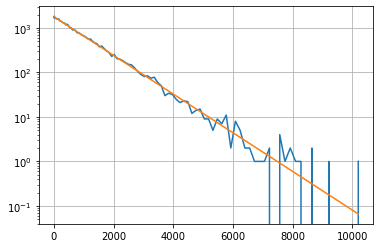

In [66]:
xvals = np.arange(bx.shape[0])
plt.semilogy(xvals**2, bx)
plt.semilogy(xvals**2, bx[0]*np.exp(-xvals**2 / n_steps))
plt.grid(True)

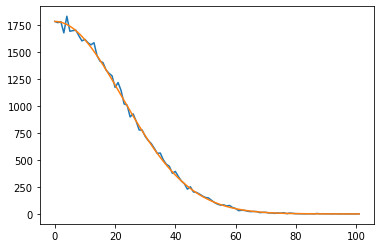

In [67]:
xvals = np.arange(bx.shape[0])
plt.plot(xvals, bx)
plt.plot(xvals, bx[0]*np.exp(-xvals**2 / n_steps))

# The distribution of $R^2$

In [70]:
r2 = x**2 + y**2
r2.sort()

bc = np.bincount(r2)

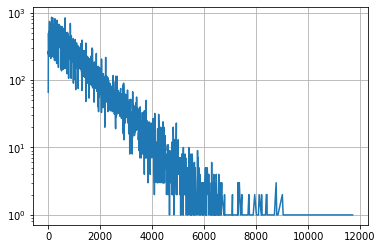

In [72]:
mask = bc != 0

plt.semilogy(mask.nonzero()[0], bc[mask])
plt.grid(True)

In [73]:
r, = mask.nonzero()

<ipython-input-84-a7c5d5c216cf>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(r, bc[mask] / np.sqrt(r), '.')


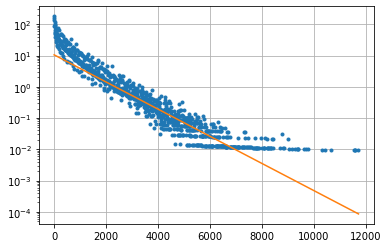

In [84]:
plt.semilogy(r, bc[mask] / np.sqrt(r), '.')
plt.semilogy(r, bc[0] * np.exp(-r/n_steps) / 2 / np.pi)
plt.grid(True)